In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [6]:
mnist.train.num_examples

55000

In [7]:
mnist.test.num_examples

10000

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
mnist.train

In [5]:
from pprint import pprint
pprint(mnist.train.__dict__)

{'_epochs_completed': 0,
 '_images': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 '_index_in_epoch': 0,
 '_labels': array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]]),
 '_num_examples': 55000}


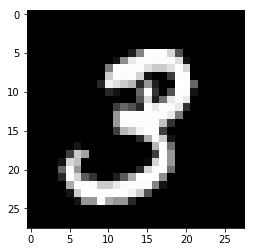

In [6]:
single_image = mnist.train.images[1].reshape(28,28)
plt.imshow(single_image,cmap='gist_gray')

In [7]:
single_image.min()

0.0

In [8]:
single_image.max()

1.0

### Create Model

In [3]:
from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

In [8]:
sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32,shape=[None,784], name="x")
W = tf.Variable(tf.zeros([784,10]), name="W")
b = tf.Variable(tf.zeros([10]), name="b")
y = tf.matmul(x,W) + b 

y_true = tf.placeholder(tf.float32,[None,10])

# cross entropy
all_cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y)
cross_entropy = tf.reduce_mean(all_cross_entropy) # reduce_mean: reduce matrix dimension by mean

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

# plot loss
summer_op = tf.summary.scalar("loss", cross_entropy)
summary_writer = tf.summary.FileWriter('./tmp/tfboard', graph=tf.get_default_graph())
# session
init = tf.global_variables_initializer()

sess.run(init)
all_loss = []
for step in range(5000):
    batch_x, batch_y = mnist.train.next_batch(1000)
    _, cross_entropy_val, summary = sess.run([train, cross_entropy, summer_op], feed_dict={x:batch_x, y_true:batch_y})
    summary_writer.add_summary(summary, step)
    if step%100 == 0:
        print('step:', step,' cross_entropy:',cross_entropy_val)
        all_loss.append(cross_entropy_val)
matches = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1)) # argmax: index of max value
acc = tf.reduce_mean(tf.cast(matches,tf.float32)) # cast: change type

acc_val, matches_val, y_eval = sess.run([acc, matches, y] ,feed_dict={x:mnist.test.images,y_true:mnist.test.labels})
acc_val

step: 0  cross_entropy: 2.3025827
step: 100  cross_entropy: 0.41038007
step: 200  cross_entropy: 0.31080925
step: 300  cross_entropy: 0.3657348
step: 400  cross_entropy: 0.28329074
step: 500  cross_entropy: 0.3065441
step: 600  cross_entropy: 0.24006915
step: 700  cross_entropy: 0.35104322
step: 800  cross_entropy: 0.2686358
step: 900  cross_entropy: 0.25933403
step: 1000  cross_entropy: 0.27326006
step: 1100  cross_entropy: 0.26252398
step: 1200  cross_entropy: 0.22953539
step: 1300  cross_entropy: 0.31720513
step: 1400  cross_entropy: 0.30335876
step: 1500  cross_entropy: 0.2757673
step: 1600  cross_entropy: 0.23804672
step: 1700  cross_entropy: 0.25906926
step: 1800  cross_entropy: 0.26442662
step: 1900  cross_entropy: 0.27287042
step: 2000  cross_entropy: 0.26976374
step: 2100  cross_entropy: 0.2951034
step: 2200  cross_entropy: 0.30622426
step: 2300  cross_entropy: 0.27784193
step: 2400  cross_entropy: 0.2506589
step: 2500  cross_entropy: 0.20742637
step: 2600  cross_entropy: 0.29

0.9253

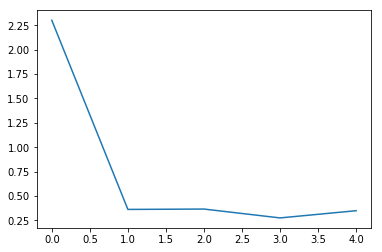

In [80]:
plt.plot(all_loss)

[-5.019227   -0.14177534  1.4439173   2.3795779  -0.79557437  2.6609306
 -0.00802527 -3.1621957   2.4791222   0.16324711]


('label:', 3)

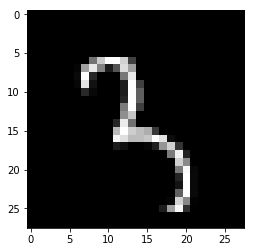

In [61]:
false_index = np.where(matches_val==False)[0][8]
image_data = mnist.test.images[false_index].reshape(28,-1)
plt.imshow(image_data, cmap='gist_gray')
print(y_eval[false_index])
'label:', np.argmax(mnist.test.labels[false_index])

### Weight

(-0.58829176, 0.33051315)

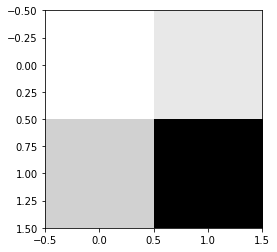

In [59]:
# understand how gist_gray works
plt.imshow([[1,0],[-1,-10]], cmap='gist_gray')
img_0.min(),img_0.max()

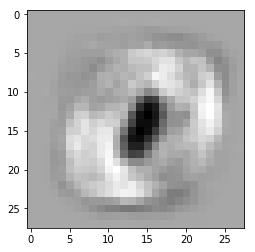

In [71]:
weight = W.eval()

img_0 = weight[:,0].reshape(28,-1)
plt.imshow(img_0, cmap='gist_gray')

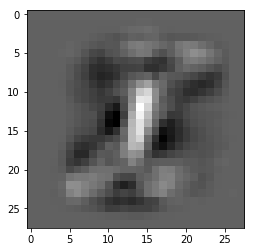

In [72]:
img_1 = weight[:,1].reshape(28,-1)
plt.imshow(img_1, cmap='gist_gray')

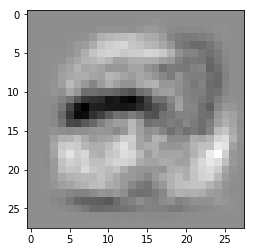

In [73]:
img_2 = weight[:,2].reshape(28,-1)
plt.imshow(img_2, cmap='gist_gray')

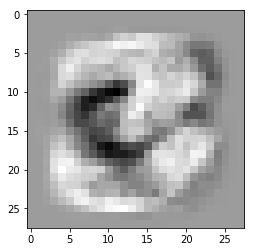

In [74]:
img_3 = weight[:,3].reshape(28,-1)
plt.imshow(img_3, cmap='gist_gray')

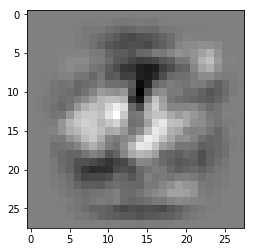

In [75]:
img_4 = weight[:,4].reshape(28,-1)
plt.imshow(img_4, cmap='gist_gray')

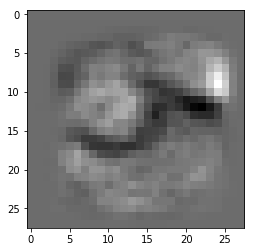

In [76]:
img_5 = weight[:,5].reshape(28,-1)
plt.imshow(img_5, cmap='gist_gray')

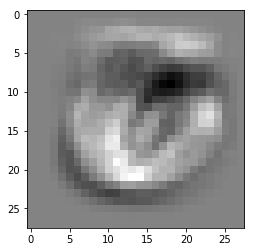

In [67]:
img_6 = weight[:,6].reshape(28,-1)
plt.imshow(img_6, cmap='gist_gray')

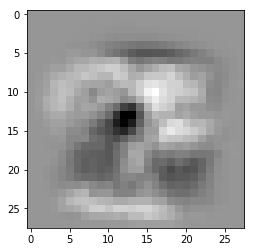

In [61]:
img_7 = weight[:,7].reshape(28,-1)
plt.imshow(img_7, cmap='gist_gray')

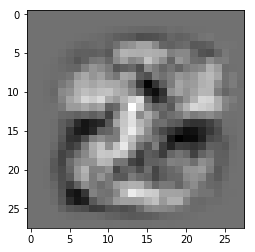

In [68]:
img_8 = weight[:,8].reshape(28,-1)
plt.imshow(img_8, cmap='gist_gray')

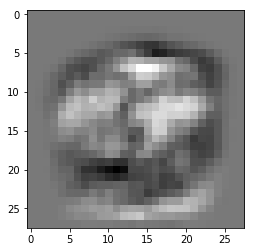

In [69]:
img_9 = weight[:,9].reshape(28,-1)
plt.imshow(img_9, cmap='gist_gray')